__Описание проекта "Обучение с учителем: качество модели".__

   Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


__План выполнения:__

  1. Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
  
  2. Собрать данные по клиентам по следующим группам: 
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

 3. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


 4. В исследование включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.


 5. Используя данные модели и данные о прибыльности клиентов,выделить сегменты покупателей и разработать для них персонализированные предложения.

## __Шаг 1. Загрузка данных__

Загрузим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification
!pip install shap
import shap
RANDOM_STATE = 42
TEST_SIZE=0.25

Загрузим данные, и ознакомимся с ними.

In [2]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv')

In [3]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [4]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [6]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [7]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [8]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [9]:
money.head()

,id;Прибыль
215348;0,98.0
215349;4,16.0
215350;3,13.0
215351;4,87.0
215352;4,21.0


In [10]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')

In [11]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [12]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


__Вывод: Шаг 1.__ 
  
Загрузили 4 датасета: market_file, market_money, market_time, money.  
 - В датасете market_file необходимо привести названия столбцов к змеевому виду (русский язык оставим);  
 - Названия столбцов в датасете market_time приведем 
    к единому виду, с большой буквы;  
- Тип данных релевантен; 
 - В датасете money столбцы разделили по символу ';', разделитель десятичных значений заменили с ',' на '.'.

## __Шаг 2. Предобработка данных__

Проверим названия столбцов и приведем их к единому виду при необходимости:

In [13]:
display(market_file.columns)
display(market_money.columns)
display(market_time.columns)
display(money.columns)

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Выручка'], dtype='object')

Index(['id', 'Период', 'минут'], dtype='object')

Index(['id', 'Прибыль'], dtype='object')

In [14]:
market_file.columns = ['id', 
                       'Покупательская_активность', 
                       'Тип_cервиса', 
                       'Разрешить_сообщать', 
                       'Маркет_актив_6_мес', 
                       'Маркет_актив_тек_мес', 
                       'Длительность', 
                       'Акционные_покупки', 
                       'Популярная_категория',
                       'Средний_просмотр_категорий_за_визит',
                       'Неоплаченные_продукты_штук_квартал', 
                       'Ошибка_сервиса',
                       'Страниц_за_визит']

In [15]:
market_time.columns = ['id', 'Период', 'Минут']

In [16]:
display(market_file.columns)
display(market_time.columns)

Index(['id', 'Покупательская_активность', 'Тип_cервиса', 'Разрешить_сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

Index(['id', 'Период', 'Минут'], dtype='object')

Проверим данные на пропуски:

In [17]:
display(market_file.isna().sum())
display(market_time.isna().sum())
display(market_money.isna().sum())
display(money.isna().sum())

id                                     0
Покупательская_активность              0
Тип_cервиса                            0
Разрешить_сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

id        0
Период    0
Минут     0
dtype: int64

id         0
Период     0
Выручка    0
dtype: int64

id         0
Прибыль    0
dtype: int64

Пропусков в данных не обнаружено.

Проверим данные на наличие явных дубликатов:

In [18]:
display(market_file.duplicated().sum())
display(market_time.duplicated().sum())
display(market_money.duplicated().sum())
display(money.duplicated().sum())

0

0

0

0

Явных дубликатов не обнаружено. 
    
  
Проведем поиск неявных дубликатов:

In [19]:
display(market_file['Покупательская_активность'].unique())
display(market_file['Тип_cервиса'].unique())
display(market_file['Разрешить_сообщать'].unique())
display(market_file['Популярная_категория'].unique())
display(market_time['Период'].unique())
display(market_money['Период'].unique())

array(['Снизилась', 'Прежний уровень'], dtype=object)

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [20]:
market_time['Период'] = market_time['Период'].replace(['предыдцщий_месяц'], 'предыдущий_месяц')
market_file['Тип_cервиса'] = market_file['Тип_cервиса'].replace(['стандартт'], 'стандарт')

In [21]:
display(market_time['Период'].unique())
display(market_money['Период'].unique())
display(market_file['Тип_cервиса'].unique())

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['премиум', 'стандарт'], dtype=object)

В данных были обнаруженны и исправленны неявные дубликаты.

__Вывод: Шаг 2.__ 
  
Провели предобработку данных 4 датасетов: market_file, market_money, market_time.  
 - Названия столбцов, где это было необходимо, привели к единому виду (названия всех столбцов начинаются с большой буквы, змеевой вид,  русский язык оставили);  
 - Проверили данные на пропуски, пропусков не обнаружено;  
 - Проверили данные на наличие явных и неявных дубликатов (явных дубликатов не обнаружено, от неявных дубликатов избавились).

## __Шаг 3. Исследовательский анализ данных.__
  
  
Провести исследовательский анализ данных из каждой таблицы.   
  
Отобрать клиентов с покупательской активностью не менее трех месяцев, то есть таких, которые что-либо покупали  в этот период. 
  
Оформить вывод по результатам шага.

Проанализируем таблицу market_file, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

In [22]:
display(market_file.describe())
display(market_file.describe(include='object'))
display(market_file['Покупательская_активность'].value_counts())

,id,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


,Покупательская_активность,Тип_cервиса,Разрешить_сообщать,Популярная_категория
count,1300,1300,1300,1300
unique,2,2,2,6
top,Прежний уровень,стандарт,да,Товары для детей
freq,802,924,962,330


Прежний уровень    802
Снизилась          498
Name: Покупательская_активность, dtype: int64

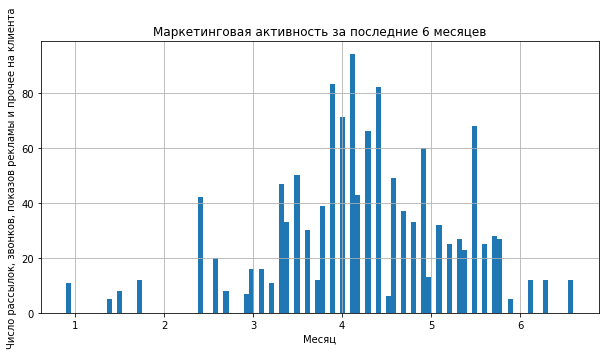

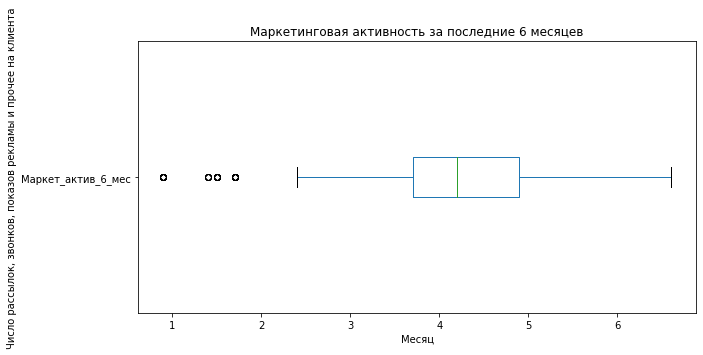

In [23]:
market_file['Маркет_актив_6_мес'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title ('Маркетинговая активность за последние 6 месяцев')
plt.xlabel ('Месяц')
plt.ylabel('Число рассылок, звонков, показов рекламы и прочее на клиента')
plt.show()

market_file['Маркет_актив_6_мес'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Маркетинговая активность за последние 6 месяцев')
plt.xlabel ('Месяц')
plt.ylabel('Число рассылок, звонков, показов рекламы и прочее на клиента')
plt.show()

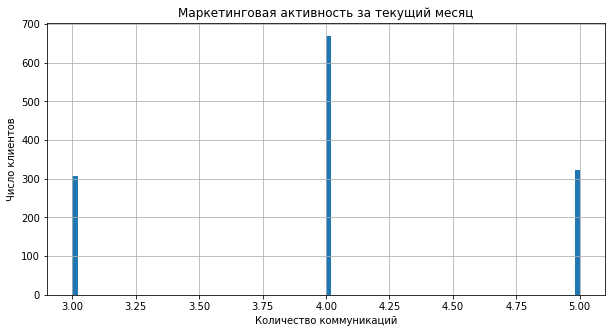

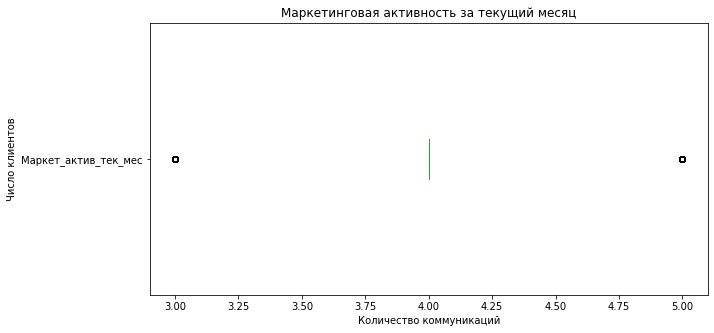

In [24]:
market_file['Маркет_актив_тек_мес'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title ('Маркетинговая активность за текущий месяц')
plt.xlabel ('Количество коммуникаций')
plt.ylabel('Число клиентов')
plt.show()

market_file['Маркет_актив_тек_мес'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Маркетинговая активность за текущий месяц')
plt.xlabel ('Количество коммуникаций')
plt.ylabel('Число клиентов')
plt.show()

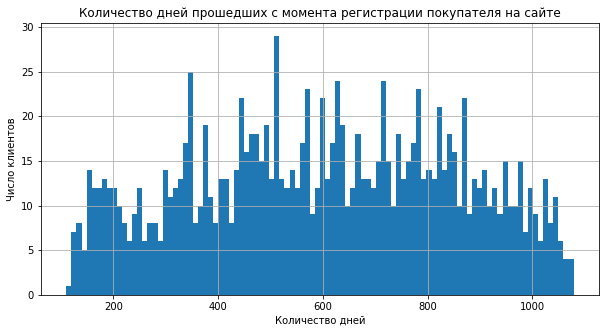

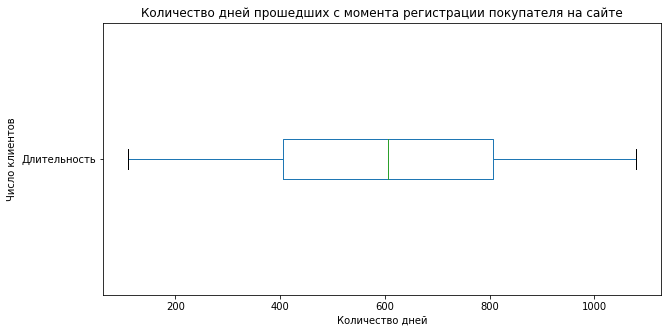

In [25]:
market_file['Длительность'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title ('Количество дней прошедших с момента регистрации покупателя на сайте')
plt.xlabel ('Количество дней')
plt.ylabel('Число клиентов')
plt.show()

market_file['Длительность'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Количество дней прошедших с момента регистрации покупателя на сайте')
plt.xlabel ('Количество дней')
plt.ylabel('Число клиентов')
plt.show()

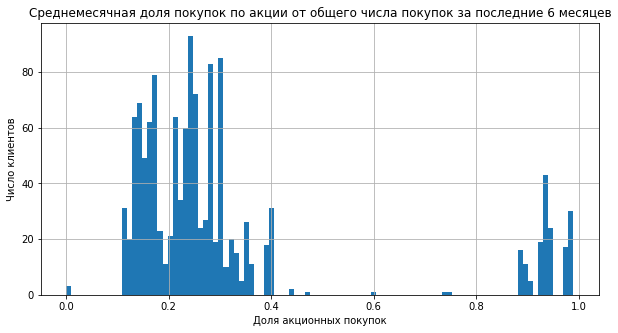

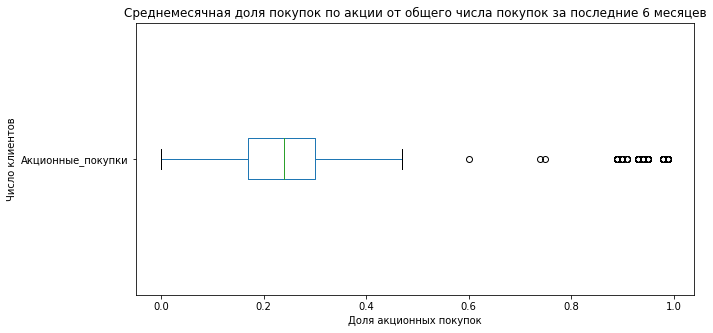

In [26]:
market_file['Акционные_покупки'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title ('Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.xlabel ('Доля акционных покупок')
plt.ylabel('Число клиентов')
plt.show()

market_file['Акционные_покупки'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.xlabel ('Доля акционных покупок')
plt.ylabel('Число клиентов')
plt.show()

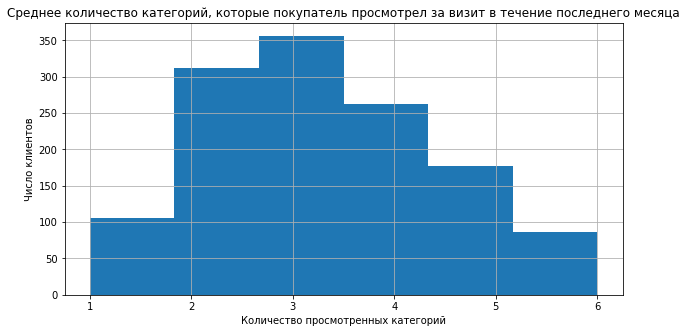

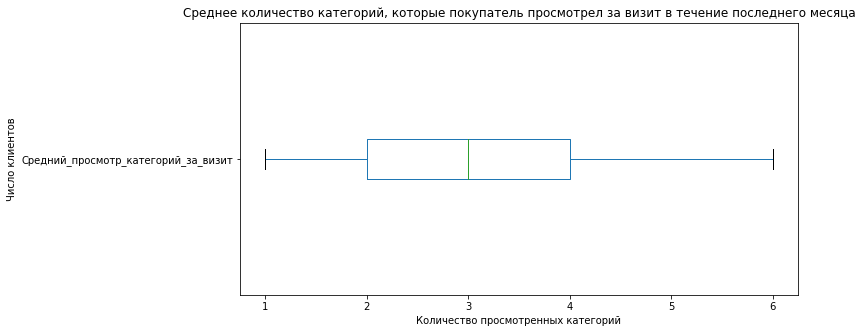

In [27]:
market_file['Средний_просмотр_категорий_за_визит'].plot(kind='hist', bins=6, grid=True, figsize=(10, 5))
plt.title ('Среднее количество категорий, которые покупатель просмотрел за визит в течение последнего месяца')
plt.xlabel ('Количество просмотренных категорий')
plt.ylabel('Число клиентов')
plt.show()

market_file['Средний_просмотр_категорий_за_визит'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Среднее количество категорий, которые покупатель просмотрел за визит в течение последнего месяца')
plt.xlabel ('Количество просмотренных категорий')
plt.ylabel('Число клиентов')
plt.show()

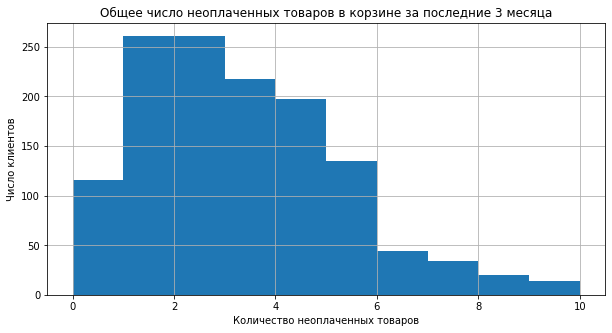

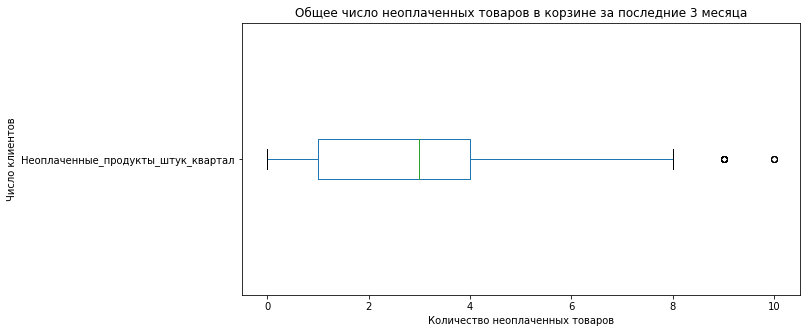

In [28]:
market_file['Неоплаченные_продукты_штук_квартал'].plot(kind='hist', bins=10, grid=True, figsize=(10, 5))
plt.title ('Общее число неоплаченных товаров в корзине за последние 3 месяца')
plt.xlabel ('Количество неоплаченных товаров')
plt.ylabel('Число клиентов')
plt.show()

market_file['Неоплаченные_продукты_штук_квартал'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Общее число неоплаченных товаров в корзине за последние 3 месяца')
plt.xlabel ('Количество неоплаченных товаров')
plt.ylabel('Число клиентов')
plt.show()

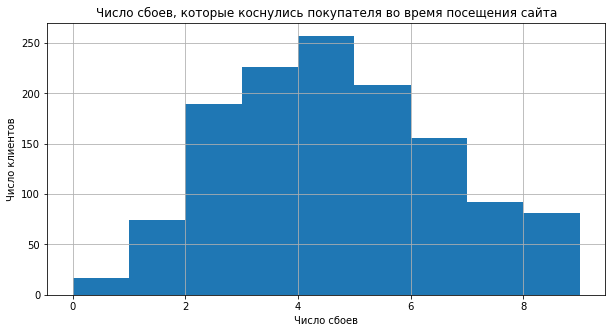

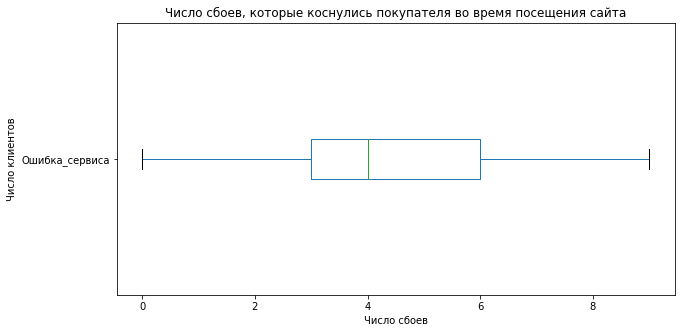

In [29]:
market_file['Ошибка_сервиса'].plot(kind='hist', bins=9, grid=True, figsize=(10, 5))
plt.title ('Число сбоев, которые коснулись покупателя во время посещения сайта')
plt.xlabel ('Число сбоев')
plt.ylabel('Число клиентов')
plt.show()

market_file['Ошибка_сервиса'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Число сбоев, которые коснулись покупателя во время посещения сайта')
plt.xlabel ('Число сбоев')
plt.ylabel('Число клиентов')
plt.show()

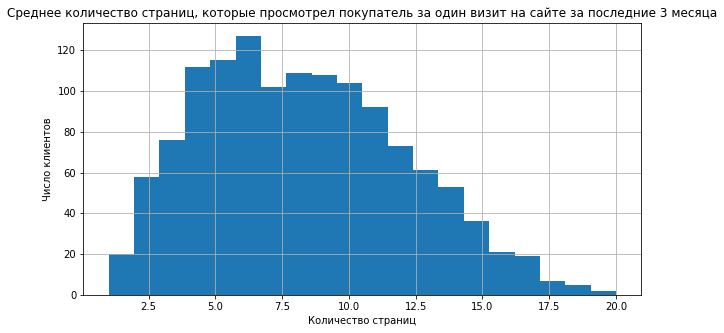

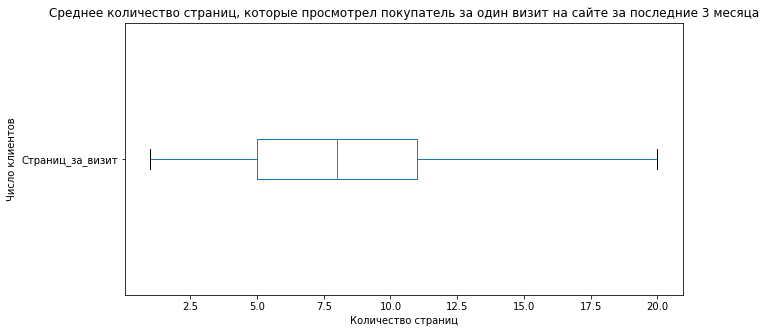

In [30]:
market_file['Страниц_за_визит'].plot(kind='hist', bins=20, grid=True, figsize=(10, 5))
plt.title ('Среднее количество страниц, которые просмотрел покупатель за один визит на сайте за последние 3 месяца')
plt.xlabel ('Количество страниц')
plt.ylabel('Число клиентов')
plt.show()

market_file['Страниц_за_визит'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title ('Среднее количество страниц, которые просмотрел покупатель за один визит на сайте за последние 3 месяца')
plt.xlabel ('Количество страниц')
plt.ylabel('Число клиентов')
plt.show()

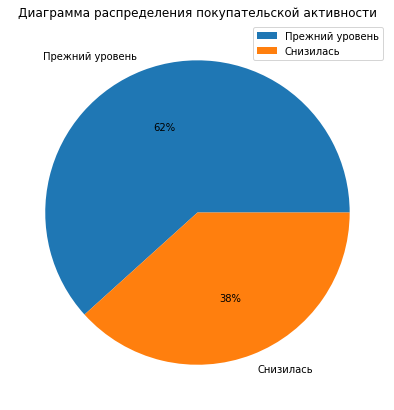

In [31]:
market_file.pivot_table(index='Покупательская_активность', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(7,7),
                                                 label='')
plt.title('Диаграмма распределения покупательской активности')
plt.show()

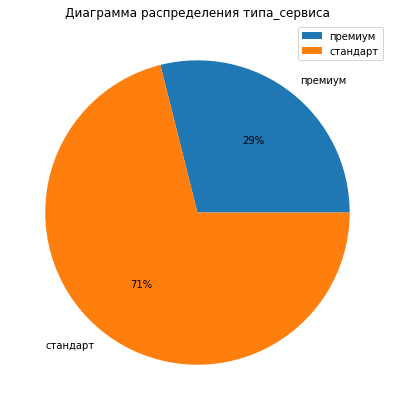

In [32]:
market_file.pivot_table(index='Тип_cервиса', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(7,7),
                                                 label='')
plt.title('Диаграмма распределения типа_cервиса')
plt.show()

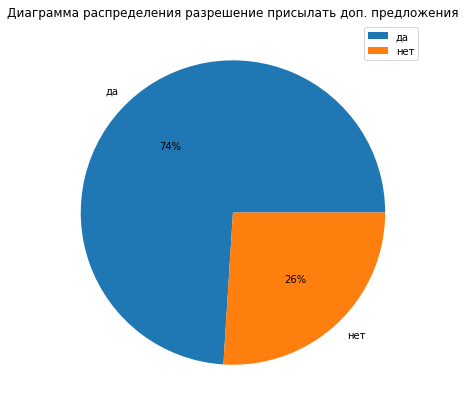

In [33]:
market_file.pivot_table(index='Разрешить_сообщать', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(7,7),
                                                 label='')
plt.title('Диаграмма распределения разрешение присылать доп. предложения')
plt.show()

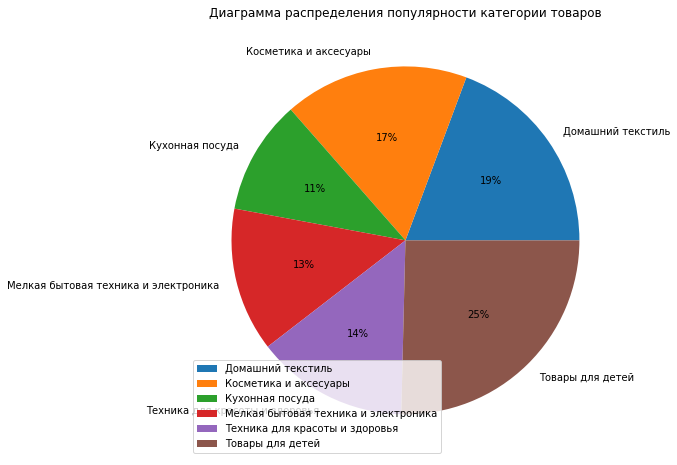

In [34]:
market_file.pivot_table(index='Популярная_категория', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(8,8),
                                                 label='')
plt.title('Диаграмма распределения популярности категории товаров')
plt.show()

Проанализируем таблицу market_time с данными о времени, которое покупатель провёл на сайте:

In [35]:
display(market_time.describe())
display(market_time.describe(include='object'))
display(market_time['Период'].value_counts())
display(market_time.groupby('Период')['Минут'].describe())

,id,Минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


,Период
count,2600
unique,2
top,предыдущий_месяц
freq,1300


предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

,count,mean,std,min,25%,50%,75%,max
Период,,,,,,,,
предыдущий_месяц,1300.0,13.467692,3.932029,5.0,11.0,13.0,17.0,23.0
текущий_месяц,1300.0,13.204615,4.220589,4.0,10.0,13.0,16.0,23.0


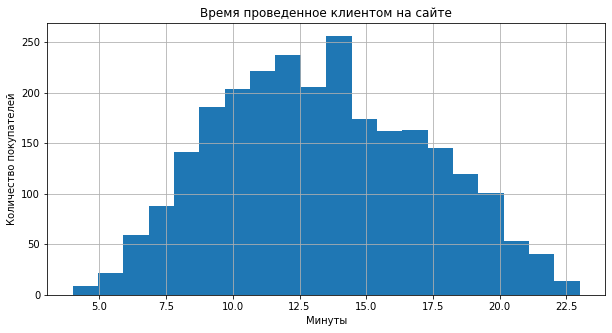

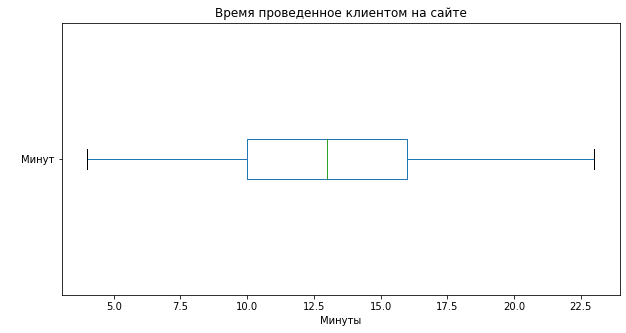

In [36]:
market_time['Минут'].plot(kind='hist', bins=20, grid=True, figsize=(10, 5))
plt.title('Время проведенное клиентом на сайте')
plt.xlabel('Минуты')
plt.ylabel('Количество покупателей')  
plt.show()

market_time['Минут'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title('Время проведенное клиентом на сайте')
plt.xlabel('Минуты')
plt.ylabel(' ')  
plt.show()

За предыдущий и текущий месяц время пребывания клиентов на сайте не изменилось.

Построим графики сгруппировав данные по периоду:

In [37]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   Минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


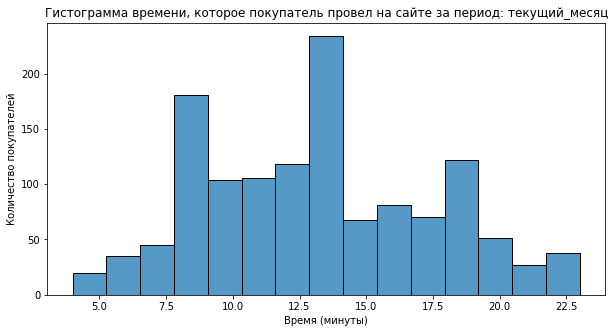

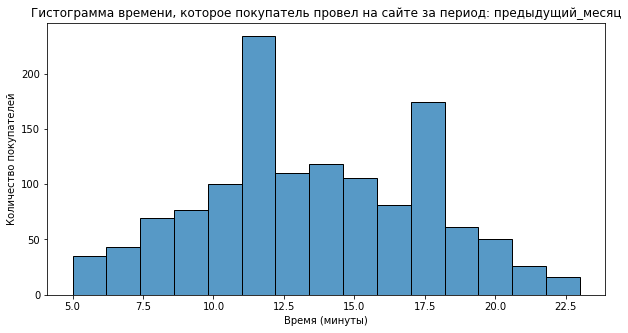

In [38]:
unique_periods_time = market_time['Период'].unique()

for period_time in unique_periods_time:
    df_period_time = market_time[market_time['Период'] == period_time]

    plt.figure(figsize=(10, 5))
    
    sns.histplot(data=df_period_time, x='Минут', kde=False, bins=15)
    
    plt.title(f'Гистограмма времени, которое покупатель провел на сайте за период: {period_time}')
    plt.xlabel('Время (минуты)')
    plt.ylabel('Количество покупателей')
    
    plt.show()

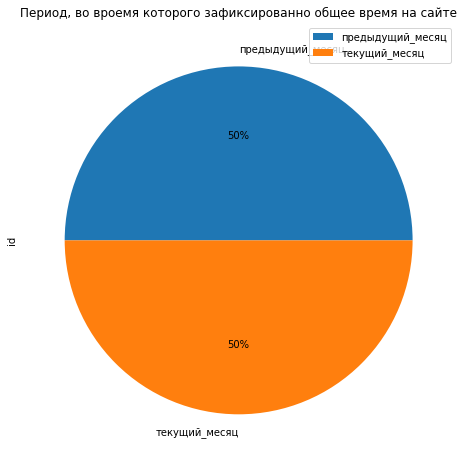

In [39]:
market_time.pivot_table(index='Период', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(8,8))
plt.title('Период, во вроемя которого зафиксированно общее время на сайте')
plt.show()

Проанализируем таблицу market_money, которая содержит данные о выручке, которую магазин получает с покупателя:

In [40]:
display(market_money.describe())
display(market_money.describe(include='object'))
display(market_money.groupby('Период')['Выручка'].describe())

,id,Выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


,Период
count,3900
unique,3
top,препредыдущий_месяц
freq,1300


,count,mean,std,min,25%,50%,75%,max
Период,,,,,,,,
предыдущий_месяц,1300.0,4936.920385,739.597997,0.0,4496.75,5005.00,5405.625,6869.5
препредыдущий_месяц,1300.0,4825.206923,405.979663,0.0,4583.00,4809.00,5053.500,5663.0
текущий_месяц,1300.0,5314.960846,2939.708156,2758.7,4706.05,5179.95,5761.725,106862.2


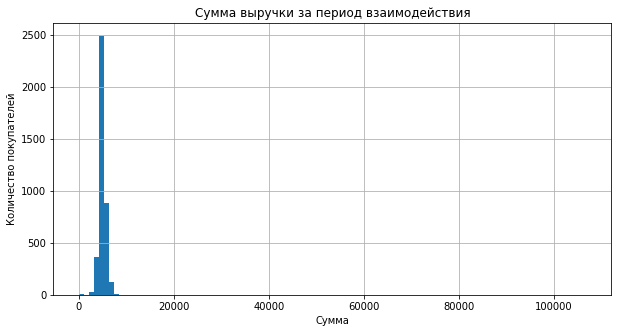

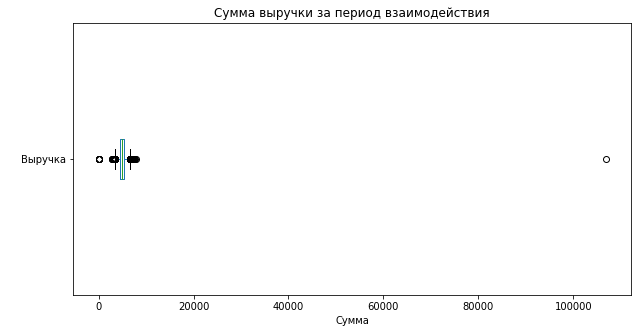

In [41]:
market_money['Выручка'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title('Сумма выручки за период взаимодействия')
plt.xlabel('Сумма')
plt.ylabel('Количество покупателей')  
plt.show()

market_money['Выручка'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title('Сумма выручки за период взаимодействия')
plt.xlabel('Сумма')
plt.ylabel(' ')  
plt.show()

Видим аномально большу сумму. Просмотрим подробнее.

In [42]:
market_money.sort_values(by='Выручка', ascending=False).head(10)

,id,Период,Выручка
98,215380,текущий_месяц,106862.2
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
566,215536,текущий_месяц,7467.9
2266,216103,текущий_месяц,7410.0
1003,215682,текущий_месяц,7401.6
1632,215892,текущий_месяц,7401.6
1573,215872,текущий_месяц,7374.0


От покупателя id 215380 аномально большая сумма выручки (106 862), сильно превышающая среднюю выручку (5 025). 
Возможная причина аномалии: 
- человеческий фактор (ошибка ввода суммы выручки), 
- сумма выручки действительно большая, из-за крупного заказа. 
  
Заменим сумму выручки у этого покупателя на медианную, для получения более ровных данных.


In [43]:
market_money.loc[98,'Выручка'] = market_money['Выручка'].median()

In [44]:
market_money.sort_values(by='Выручка', ascending=False).head(10)

,id,Период,Выручка
435,215493,текущий_месяц,7799.4
262,215435,текущий_месяц,7605.3
1481,215841,текущий_месяц,7557.0
2388,216144,текущий_месяц,7547.8
566,215536,текущий_месяц,7467.9
2266,216103,текущий_месяц,7410.0
1003,215682,текущий_месяц,7401.6
1632,215892,текущий_месяц,7401.6
1573,215872,текущий_месяц,7374.0
2922,216322,текущий_месяц,7370.6


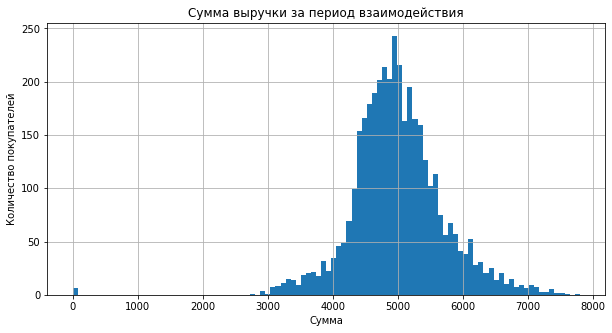

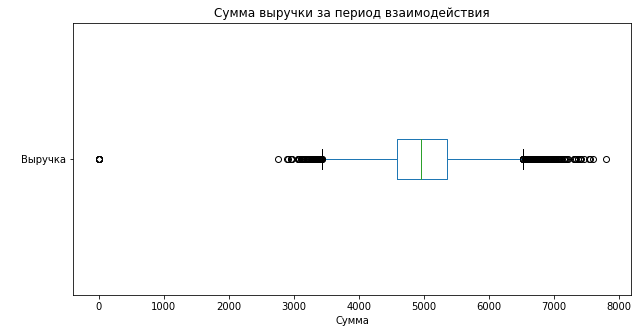

In [45]:
market_money['Выручка'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title('Сумма выручки за период взаимодействия')
plt.xlabel('Сумма')
plt.ylabel('Количество покупателей')  
plt.show()

market_money['Выручка'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title('Сумма выручки за период взаимодействия')
plt.xlabel('Сумма')
plt.ylabel(' ')  
plt.show()

In [46]:
market_money.sort_values(by='Выручка', ascending=True).head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
356,215466,текущий_месяц,2758.7
649,215564,предыдущий_месяц,2890.0
662,215568,предыдущий_месяц,2909.0
2485,216176,текущий_месяц,2952.2


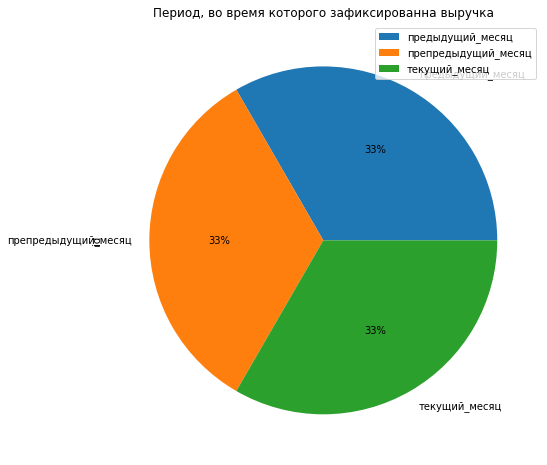

In [47]:
market_money.pivot_table(index='Период', 
                        aggfunc='count').plot.pie(y='id', 
                                                 autopct='%1.0f%%', 
                                                 figsize=(8,8))
plt.title('Период, во время которого зафиксированна выручка')
plt.show()

Отберем покупателей которые были активны в последние 3 месяца:

In [48]:
market_money['Выручка'].isna().sum()

0

In [49]:
market_money['Выручка'] = market_money['Выручка'].fillna(0)

In [50]:
market_money=market_money[market_money.id.isin(market_money.query('Выручка==0')['id'].unique())==False]

In [51]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   Период   3891 non-null   object 
 2   Выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


порлучим ID клиентов с нулевой выручкой в каком либо из периодов:

In [52]:
market_money.sort_values(by='Выручка', ascending=True).head(10)

,id,Период,Выручка
356,215466,текущий_месяц,2758.7
649,215564,предыдущий_месяц,2890.0
662,215568,предыдущий_месяц,2909.0
2485,216176,текущий_месяц,2952.2
392,215478,предыдущий_месяц,2960.0
3860,216634,предыдущий_месяц,2970.0
3291,216445,предыдущий_месяц,3061.0
1106,215716,предыдущий_месяц,3067.0
390,215478,текущий_месяц,3078.3
637,215560,текущий_месяц,3083.7


построим графики для каждого периода:

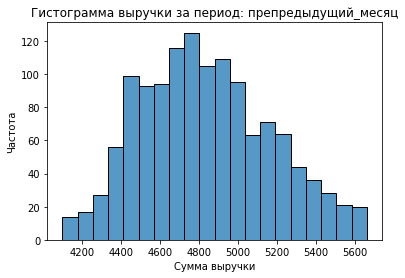

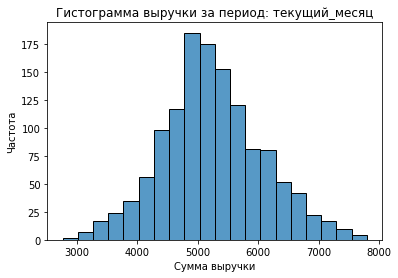

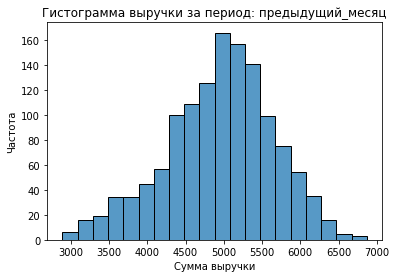

In [53]:
unique_periods_money = market_money['Период'].unique()

for period in unique_periods_money:
    df_period = market_money[market_money['Период'] == period]

    plt.figure(figsize=(6, 4))
    
    sns.histplot(data=df_period, x='Выручка', kde=False, bins=20)
    
    plt.title(f'Гистограмма выручки за период: {period}')
    plt.xlabel('Сумма выручки')
    plt.ylabel('Частота')
    
    plt.show()

Проанализируем таблицу money, которая содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

In [54]:
display(money.describe())

,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


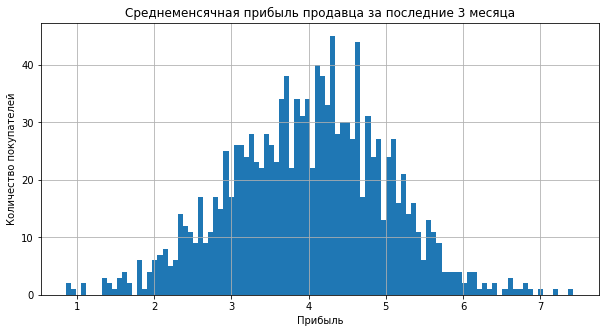

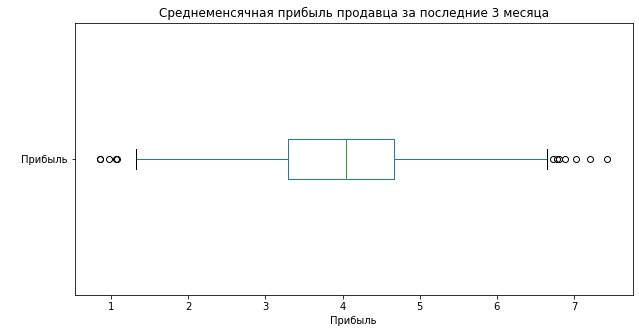

In [55]:
money['Прибыль'].plot(kind='hist', bins=100, grid=True, figsize=(10, 5))
plt.title('Среднеменсячная прибыль продавца за последние 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')  
plt.show()

money['Прибыль'].plot(kind='box', vert=False, figsize=(10, 5))
plt.title('Среднеменсячная прибыль продавца за последние 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel(' ')  
plt.show()

__Вывод: Шаг 3.__  

В процессе исследовательского анализа выяснилось:
- Пользовательская активность у большинства покупателей сохраняется на прежнем уровне(62%)
- Большиство покупателей выбирает стандартный тип сервиса (71%)
- Дают свое согласие на рассылку сообщений 74% пользователей, что говорит о заинтересованности покупателей в получении новых предложений.
- В тройку самых популярных групп товаров входят:   
  1) Товары для детей (25%)  
  2) Домашний текстиль (19%)  
  3) Косметика и аксессуары (17%).  
- В среднем пользователи на сайте проводщят около 13 минут (общее время проведенное на сайте за текушщий и предыдущий месяцы одинаоко).
- Выявили 1 аномально большую выручку 106862, что в 20 раз превышает среднюю выручку. Заменили это значение на медианное для устранения выбросов.Возможной причиной появления аномалии мог стать человеческий фактор (ошибочно добавлена 1 цифра) или действительно была совершена крупная покупка.
- Средняя выручка от покупателей 5025.
 Если разбить сумму средней  выручки по периодам то получим следующие цифры: 
 - Текущий месяц: 5326
 - Предыдущий месяц: 4936
 - Препредыдущий месяц: 4825
 Здесь мы видим что сумма выручки имеет тенденцию к росту из месяца в месяц.

- Отобрав клиентов с покупательской активностью не менее трех месяцев, мы получили новый датафрей в котором 1297 пользователей. Это значит, что всего 3 пользователя из исходного датафрейма market_money не подошли нам по критерию.

## __Шаг 4. Объединение таблиц.__  
Объединить таблицы market_file, market_money, market_time.
Учитывая, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода

In [56]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   Минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [57]:
market_time_1=market_time[market_time['Период']=='предыдущий_месяц'].copy()

In [58]:
market_time_1.rename(columns={'Минут':'Минут_предыдущего_месяца'},inplace=True)

In [59]:
market_time_1.drop('Период', axis= 1, inplace= True )

In [60]:
market_time_2= market_time[market_time['Период']=='текущий_месяц'].copy()

In [61]:
market_time_2.rename(columns={'Минут':'Минут_текущего_месяца'},inplace=True)

In [62]:
market_time_2.drop('Период', axis= 1 , inplace= True )

In [63]:
market_time_fin = pd.merge(market_time_1, market_time_2, on='id', sort=True)

In [64]:
market_time_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   id                        1300 non-null   int64
 1   Минут_предыдущего_месяца  1300 non-null   int64
 2   Минут_текущего_месяца     1300 non-null   int64
dtypes: int64(3)
memory usage: 40.6 KB


In [65]:
market_time_fin.head()

,id,Минут_предыдущего_месяца,Минут_текущего_месяца
0,215348,13,14
1,215349,12,10
2,215350,8,13
3,215351,11,13
4,215352,8,11


In [66]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   Период   3891 non-null   object 
 2   Выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [67]:
market_money.head()

,id,Период,Выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


In [68]:
market_money_1 = market_money[market_money['Период']=='текущий_месяц'].copy()

In [69]:
market_money_1.rename(columns={'Выручка':'Выручка_текущий_месяц'},inplace=True)

In [70]:
market_money_1.drop('Период', axis= 1 , inplace= True )

In [71]:
market_money_2 = market_money[market_money['Период']=='предыдущий_месяц'].copy()

In [72]:
market_money_2.rename(columns={'Выручка':'Выручка_предыдущий_месяц'},inplace=True)

In [73]:
market_money_2.drop('Период', axis= 1 , inplace= True )

In [74]:
market_money_3 = market_money[market_money['Период']=='препредыдущий_месяц'].copy()

In [75]:
market_money_3.rename(columns={'Выручка':'Выручка_препредыдущий_месяц'},inplace=True)

In [76]:
market_money_3.drop('Период', axis= 1 , inplace= True )

In [77]:
market_money_fin = pd.merge(market_money_1, market_money_2, on='id', sort=True)

In [78]:
market_money_fin=pd.merge(market_money_fin, market_money_3, on='id', sort=True)

In [79]:
market_money_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1297 non-null   int64  
 1   Выручка_текущий_месяц        1297 non-null   float64
 2   Выручка_предыдущий_месяц     1297 non-null   float64
 3   Выручка_препредыдущий_месяц  1297 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 50.7 KB


In [80]:
market_money_fin.head()

,id,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц
0,215349,4971.6,5216.0,4472.0
1,215350,5058.4,5457.5,4826.0
2,215351,6610.4,6158.0,4793.0
3,215352,5872.5,5807.5,4594.0
4,215353,5388.5,4738.5,5124.0


In [81]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская_активность            1300 non-null   object 
 2   Тип_cервиса                          1300 non-null   object 
 3   Разрешить_сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [82]:
total_df= pd.merge(market_file, pd.merge(market_time_fin, 
         market_money_fin, 
         on='id', sort=True), on='id', sort=True)

In [83]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   Покупательская_активность            1297 non-null   object 
 2   Тип_cервиса                          1297 non-null   object 
 3   Разрешить_сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                

In [84]:
total_df.head()

,id,Покупательская_активность,Тип_cервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Минут_предыдущего_месяца,Минут_текущего_месяца,Выручка_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,4971.6,5216.0,4472.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5058.4,5457.5,4826.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6610.4,6158.0,4793.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5872.5,5807.5,4594.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,5388.5,4738.5,5124.0


__Вывод: Шаг 4__    
Успешно объединили 3 датафрейма market_file, market_money, market_time, разделив время и выручку по периодам. 

## __Шаг 5. Корреляционный анализ__. 
Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.

In [85]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   Покупательская_активность            1297 non-null   object 
 2   Тип_cервиса                          1297 non-null   object 
 3   Разрешить_сообщать                   1297 non-null   object 
 4   Маркет_актив_6_мес                   1297 non-null   float64
 5   Маркет_актив_тек_мес                 1297 non-null   int64  
 6   Длительность                         1297 non-null   int64  
 7   Акционные_покупки                    1297 non-null   float64
 8   Популярная_категория                 1297 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  Ошибка_сервиса                

In [86]:
len(total_df['id'].unique())

1297

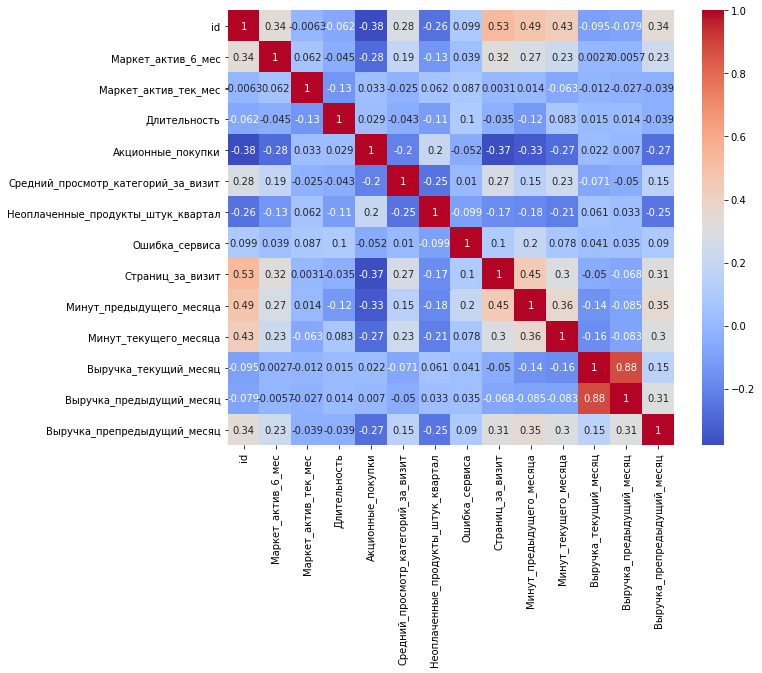

In [87]:
numeric_cols = total_df.select_dtypes(include=['number']).columns
correlation_matrix = total_df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

__Вывод: Шаг 5.__   
  
В данных прослеживается высокая кореляция только между признаками "выручка за текущий месяц" и "выручка за предыдущий месяц": 0,88. Это указывает на то, что клиенты, тратящие больше в один месяц, часто продолжают тратить аналогичные суммы в другие месяцы.

В целом, корреляции между признаками из разных категорий (например, маркетинговая активность, выручка, поведение на сайте) остаются слабыми.

Так как отсутсвует очень высокая связь между парметрами, мы можем не учитывать мультиколениальность.

## __Шаг 6. Использование пайплайнов__.     

Применим все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используем ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера. Для каждой модели можно подготовить данные с разным кодированием и масштабированием.

6.2 Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберем как минимум один гиперпараметр. Выберем подходящую для задачи метрику. Используем эту метрику при подборе гиперпараметров.
   
6.3 Выберем лучшую модель, используя заданную метрику. Для этого применим одну из стратегий:
- использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
- использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [88]:
X = total_df.drop(['id', 
                   'Покупательская_активность'], axis=1)
y = total_df['Покупательская_активность']
y= y.apply(lambda x:0 if x=='Прежний уровень' else 1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=TEST_SIZE, 
                                                    random_state=RANDOM_STATE,
                                                    stratify = y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((972, 16), (325, 16), (972,), (325,))

In [89]:
ohe_columns = ['Разрешить_сообщать',                  
               'Популярная_категория']
ord_columns = ['Тип_cервиса']
num_columns = ['Выручка_текущий_месяц',
               'Выручка_предыдущий_месяц',
               'Выручка_препредыдущий_месяц',
               'Минут_предыдущего_месяца',
               'Минут_текущего_месяца',
               'Маркет_актив_6_мес',
               'Маркет_актив_тек_мес',
               'Длительность',
               'Акционные_покупки',
               'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал',             
               'Ошибка_сервиса',            
               'Страниц_за_визит']

In [90]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(
         categories=[
             ['премиум', 'стандарт']
         ], 
         handle_unknown='use_encoded_value', unknown_value=np.nan
     )
     ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Модель KNeighbors Classifier

In [91]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])

param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

knc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

knc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', knc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации :', knc.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                   

In [92]:
choosing_model_separately = pd.DataFrame(knc.cv_results_).sort_values(
    by=['rank_test_score']
).head(1)
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
6,1,KNeighborsClassifier(n_neighbors=9),0.905009,"{'preprocessor__num': RobustScaler(), 'models_..."


Модель Decision Tree

In [93]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 700),
        'models__max_features': range(2, 16),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

dtc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

dtc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', dtc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', dtc.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                   

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

In [94]:
choosing_model_1 = pd.DataFrame(dtc.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,"{'preprocessor__num': RobustScaler(), 'models_..."
1,1,"DecisionTreeClassifier(max_depth=302, max_feat...",0.808708,"{'preprocessor__num': RobustScaler(), 'models_..."


Модель Logistic Regression

In [95]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough'],
        
    }
]

lr = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

lr.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', lr.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', lr.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                   

In [96]:
choosing_model_1 = pd.DataFrame(lr.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']]

,rank_test_score,param_models,mean_test_score,params
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,"{'preprocessor__num': RobustScaler(), 'models_..."
1,1,"DecisionTreeClassifier(max_depth=302, max_feat...",0.808708,"{'preprocessor__num': RobustScaler(), 'models_..."
2,1,"LogisticRegression(C=3, penalty='l1', random_s...",0.897684,"{'preprocessor__num': StandardScaler(), 'model..."


Модель SVC

In [97]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', SVC(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['poly', 'rbf', 'sigmoid'],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), 
                              MinMaxScaler(), 
                              RobustScaler(), 
                              'passthrough'],
        
    }
]

svc = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

svc.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', svc.best_estimator_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации :', svc.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Разрешить_сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                   

/opt/conda/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [98]:
choosing_model_1 = pd.DataFrame(svc.cv_results_).sort_values(by=['rank_test_score']).head(1)
choosing_model_separately = pd.concat([choosing_model_separately, choosing_model_1], ignore_index= True )
choosing_model_separately[['rank_test_score', 'param_models', 'mean_test_score', 'params']].sort_values(by=['mean_test_score'], ascending = False)


,rank_test_score,param_models,mean_test_score,params
3,1,"SVC(degree=5, probability=True, random_state=42)",0.914806,"{'preprocessor__num': RobustScaler(), 'models_..."
0,1,KNeighborsClassifier(n_neighbors=9),0.905009,"{'preprocessor__num': RobustScaler(), 'models_..."
2,1,"LogisticRegression(C=3, penalty='l1', random_s...",0.897684,"{'preprocessor__num': StandardScaler(), 'model..."
1,1,"DecisionTreeClassifier(max_depth=302, max_feat...",0.808708,"{'preprocessor__num': RobustScaler(), 'models_..."


Проведем финальное тестирование 

In [99]:
y_test_pred=svc.predict_proba(X_test)[:, 1]

In [100]:
print('Метрика ROC-AUC лучшей модели на тестовой выборке:', {roc_auc_score(y_test, y_test_pred)})

('Метрика ROC-AUC лучшей модели на тестовой выборке:', {0.9209998395121168})

__Вывод Шаг 6__

Лучшей моделью оказалась SVC(0.914).  

KNeighborsClassifier (0.905),   
Decision Tree (0.808),   
Logistic Regression (0.897)

Значения ROC-AUC выше 0.9 говорят о том, что модель очень хорошо разделяет классы.

## __Шаг 7. Анализ важности признаков__
  
7.1 Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.   

7.2 Сделаем выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

In [101]:
COUNT = 10

best_model =  svc.best_estimator_.named_steps['models']

preprocessor = svc.best_estimator_.named_steps['preprocessor'] 

#preprocessor = svc.best_estimator_.named_steps['preprocessor'].get_feature_names_out() 
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

ohe_encoder = preprocessor.named_transformers_['ohe'].named_steps['ohe']

# Проверяем доступные методы в OneHotEncoder
if hasattr(ohe_encoder, "get_feature_names_out"):
    ohe_feature_names = ohe_encoder.get_feature_names_out(input_features=ohe_columns)
else:  # Для старых версий sklearn
    categories = ohe_encoder.categories_
    ohe_feature_names = [f"{col}_{val}" for col, vals in zip(ohe_columns, categories) for val in vals[1:]]

# Объединяем имена признаков

ord_feature_names = ord_columns
num_feature_names = num_columns
all_feature_names = np.concatenate([ohe_feature_names, ord_feature_names, num_feature_names])

# Преобразуем обратно в DataFrame
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

# Выбираем небольшую выборку
X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, COUNT, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, COUNT, random_state=RANDOM_STATE)

# Проверяем размеры
print(f"X_train_preprocessed_smpl shape: {X_train_preprocessed_smpl.shape}")
print(f"X_test_preprocessed_smpl shape: {X_test_preprocessed_smpl.shape}")


X_train_preprocessed_smpl shape: (10, 20)
X_test_preprocessed_smpl shape: (10, 20)


In [102]:
explainer_2 = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values_2 = explainer_2.shap_values(X_test_preprocessed_smpl, nsamples=100)
shap.initjs()
shap.force_plot(explainer_2.expected_value[0], shap_values_2[..., 0], X_test)


  0%|          | 0/10 [00:00<?, ?it/s]

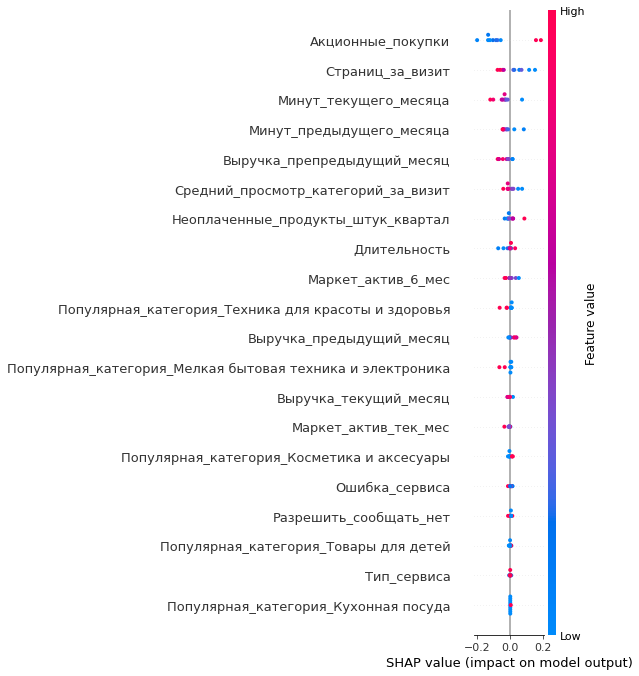

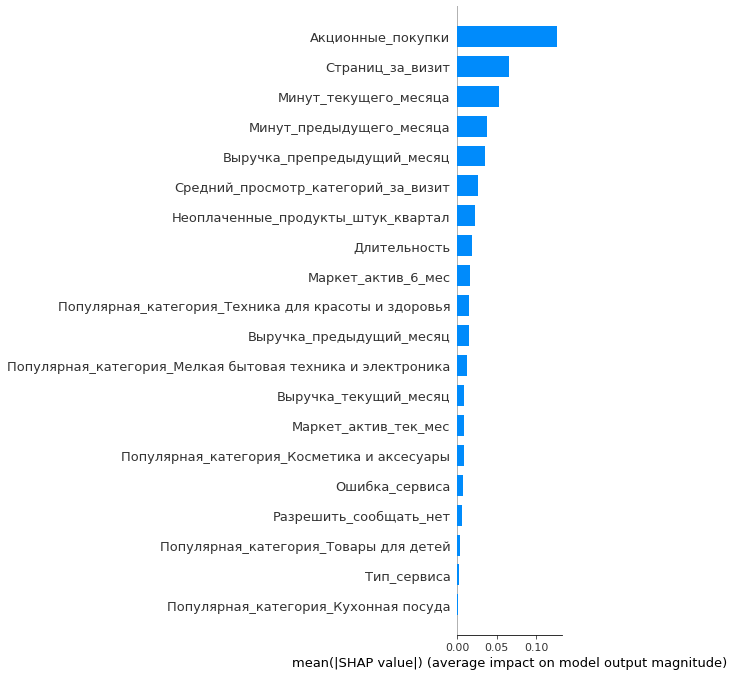

In [103]:
explainer = shap.Explainer(best_model.predict_proba, X_train_preprocessed_smpl)

shap_values = explainer(X_test_preprocessed_smpl)

shap.summary_plot(shap_values[..., 1], X_test_preprocessed_smpl, feature_names=all_feature_names)
shap.summary_plot(shap_values[..., 1], X_test_preprocessed_smpl, feature_names=all_feature_names, plot_type='bar')

__Вывод Шаг 7__

 Сильнее всего вляют на целевой признак: 
 1) Акционные_покупки,  
 2) Страниц_за_визит,  
 3) Минут_текущего_месяца,  
 4) Выручка_пердыдущего_месяца,  
 5) Минут_предыдущего_месяца.
 
 Мало значимые признаки для модели: 
 1) Популярна_категория_Кухонная_посуда,  
 2) Тип_сервиса,  
 3) Популярная_категория_Товары для детей,  
 4) Разрешить_сообщать_нет,  
 5) Ошибка_сервиса  
   
Чтобы бизнесу сфокусироваться на удержании и мотивации активных пользователей, а также на стимулировании повторных покупок стоит уделить серьезное внимание разработатке стратегии и активного продвижения акционных и персональных предложений для постоянных покупателей. 
     
Учитывая влияние времени, проведенного на сайте, стоит улучшить навигацию, фильтры и рекомендации, чтобы стимулировать пользователей проводить больше времени в сервисе.
  
Поскольку количество страниц за визит значимо, можно экспериментировать с динамическим контентом, показывая релевантные категории и продукты, увеличивающие вовлеченность.
  
Так как выручка за предыдущие месяцы влияет на активность, можно использовать программы лояльности, напоминающие клиентам о товарах, которые они покупали ранее.


## __Шаг 8. Сегментация покупателей:__  

8.1 Выполним сегментацию покупателей. Используя результаты моделирования и данные о прибыльности покупателей.  

8.2 Выберем группу покупателей и предложим, как увеличить её покупательскую активность:     
- Проведем графическое и аналитическое исследование группы покупателей.  
- Сделаем предложения по работе с сегментом для увеличения покупательской активности.  

8.3 Сделаем выводы о сегментах:    
- какой сегмент мы взяли для дополнительного исследования,  
- какие предложения мы сделали и почему.

In [104]:
preprocessor = svc.best_estimator_.named_steps['preprocessor']

In [105]:
X_transformed = preprocessor.transform(X)
X_transformed = pd.DataFrame(X_transformed)

In [106]:
#добавим вероятность снижения
total_df['Вероятность_снижения'] = svc.best_estimator_.named_steps['models'].predict_proba(X_transformed)[:, 1]

In [107]:
#добавим в датафрейм выручку клиентов за 3 месяца
total_df['Суммарная_выручка'] = (
    total_df['Выручка_текущий_месяц'] + 
    total_df['Выручка_предыдущий_месяц'] + 
    total_df['Выручка_препредыдущий_месяц']
)

In [108]:
#Разделим покупателей по вероятности ухода (используем 0.5 как порог):
total_df['Риск_оттока'] = total_df['Вероятность_снижения'].apply(lambda x: 'Высокий' if x > 0.5 else 'Низкий')

In [109]:
#Определим уровень прибыльности, разделив клиентов на три группы по квартилям:
total_df['Категория_прибыльности'] = pd.qcut(total_df['Суммарная_выручка'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])

In [110]:
#разделим клиентов по сегентам
def assign_segment(row):
    if row['Риск_оттока'] == 'Низкий' and row['Категория_прибыльности'] == 'Высокая':
        return 'Лояльные VIP'
    elif row['Риск_оттока'] == 'Низкий':
        return 'Перспективные'
    elif row['Риск_оттока'] == 'Высокий' and row['Категория_прибыльности'] == 'Высокая':
        return 'Рискованные VIP'
    else:
        return 'Отходящие'

total_df['Сегмент'] = total_df.apply(assign_segment, axis=1)

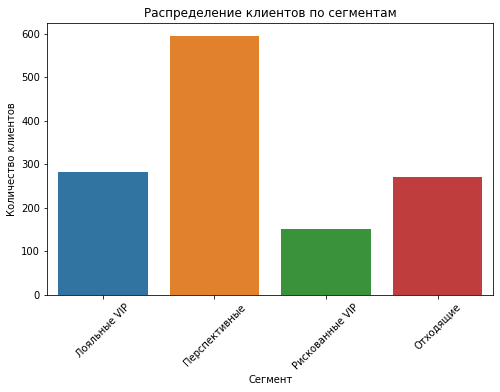

In [111]:
plt.figure(figsize=(8, 5))
sns.countplot(data=total_df, x='Сегмент', order=['Лояльные VIP', 'Перспективные', 'Рискованные VIP', 'Отходящие'])
plt.xticks(rotation=45)
plt.title('Распределение клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.show()

На визуализации мы видим что большинство покупателей находятся в сегменте "Перспективные", а "Лояльные VIP" и "Отходящие" в одинаковом количестве. 

Для детального анализа возьмем сегмент "Рискованные VIP", так как у него высокая категория прибыльности, что делает этот сегмент ключевым для бизнеса.

In [112]:
# Фильтрация двух сегментов
risky_vip = total_df[total_df["Сегмент"] == "Рискованные VIP"]
loyal_vip = total_df[total_df["Сегмент"] == "Лояльные VIP"]
perspect = total_df[total_df["Сегмент"] == "Перспективные"]
othod = total_df[total_df["Сегмент"] == "Отходящие"]

In [113]:
# Описание сегмента
print("Описание сегмента 'Рискованные VIP':")
print(risky_vip.describe())
print("\nРаспределение категориальных признаков:")
print(risky_vip.describe(include=['object', 'category']))

Описание сегмента 'Рискованные VIP':
                  id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count     150.000000          150.000000            150.000000    150.000000   
mean   215595.093333            3.592000              4.033333    651.366667   
std       227.294958            1.052866              0.718095    226.963954   
min    215351.000000            0.900000              3.000000    163.000000   
25%    215448.500000            3.000000              4.000000    466.000000   
50%    215558.500000            3.600000              4.000000    696.500000   
75%    215651.500000            4.300000              5.000000    829.000000   
max    216636.000000            5.600000              5.000000   1064.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count         150.000000                           150.000000   
mean            0.502200                             2.540000   
std             0.310449                       

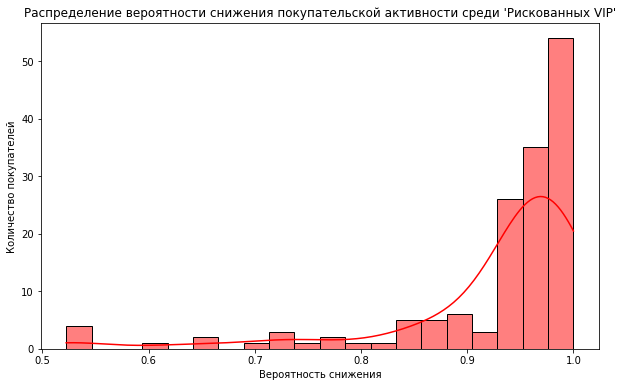

In [114]:
# График распределения вероятности снижения покупательской активности
plt.figure(figsize=(10, 6))
sns.histplot(risky_vip["Вероятность_снижения"], bins=20, kde=True, color='red')
plt.title("Распределение вероятности снижения покупательской активности среди 'Рискованных VIP'")
plt.xlabel("Вероятность снижения")
plt.ylabel("Количество покупателей")
plt.show()

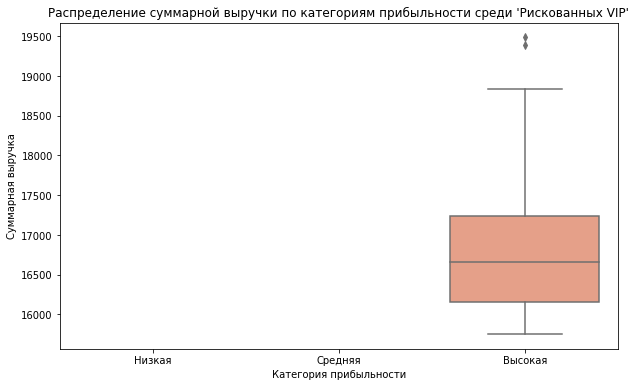

In [115]:
# Анализ выручки
plt.figure(figsize=(10, 6))
sns.boxplot(x=risky_vip["Категория_прибыльности"], y=risky_vip["Суммарная_выручка"], palette="coolwarm")
plt.title("Распределение суммарной выручки по категориям прибыльности среди 'Рискованных VIP'")
plt.xlabel("Категория прибыльности")
plt.ylabel("Суммарная выручка")
plt.show()

Выполним сравнительный анализ сегментов "Рискованных VIP" и "Лояльные VIP"

In [116]:
# Сравнительные статистики
stats_columns = [
    "Суммарная_выручка",
    "Выручка_текущий_месяц",
    "Выручка_предыдущий_месяц",
    "Минут_текущего_месяца",
    "Минут_предыдущего_месяца",
    "Вероятность_снижения",
    "Маркет_актив_6_мес",
    "Маркет_актив_тек_мес",
    "Акционные_покупки",
    "Страниц_за_визит"
       
]

summary_stats = pd.DataFrame({
    'Метрика': stats_columns,
    'Рискованные VIP': [risky_vip[m].mean() for m in stats_columns],
    'Лояльные VIP': [loyal_vip[m].mean() for m in stats_columns],
    'Перспективные': [perspect[m].mean() for m in stats_columns],
    'Отходящие': [othod[m].mean() for m in stats_columns]
})

In [117]:
summary_stats.head()

,Метрика,Рискованные VIP,Лояльные VIP,Перспективные,Отходящие
0,Суммарная_выручка,16799.327333,16706.101064,14286.412605,13899.482963
1,Выручка_текущий_месяц,6252.857333,6018.485816,4807.100840,4808.012593
2,Выручка_предыдущий_месяц,5791.696667,5588.679078,4621.768908,4530.674074
3,Минут_текущего_месяца,9.806667,14.170213,14.793277,10.614815
4,Минут_предыдущего_месяца,10.333333,14.730496,15.215126,10.048148


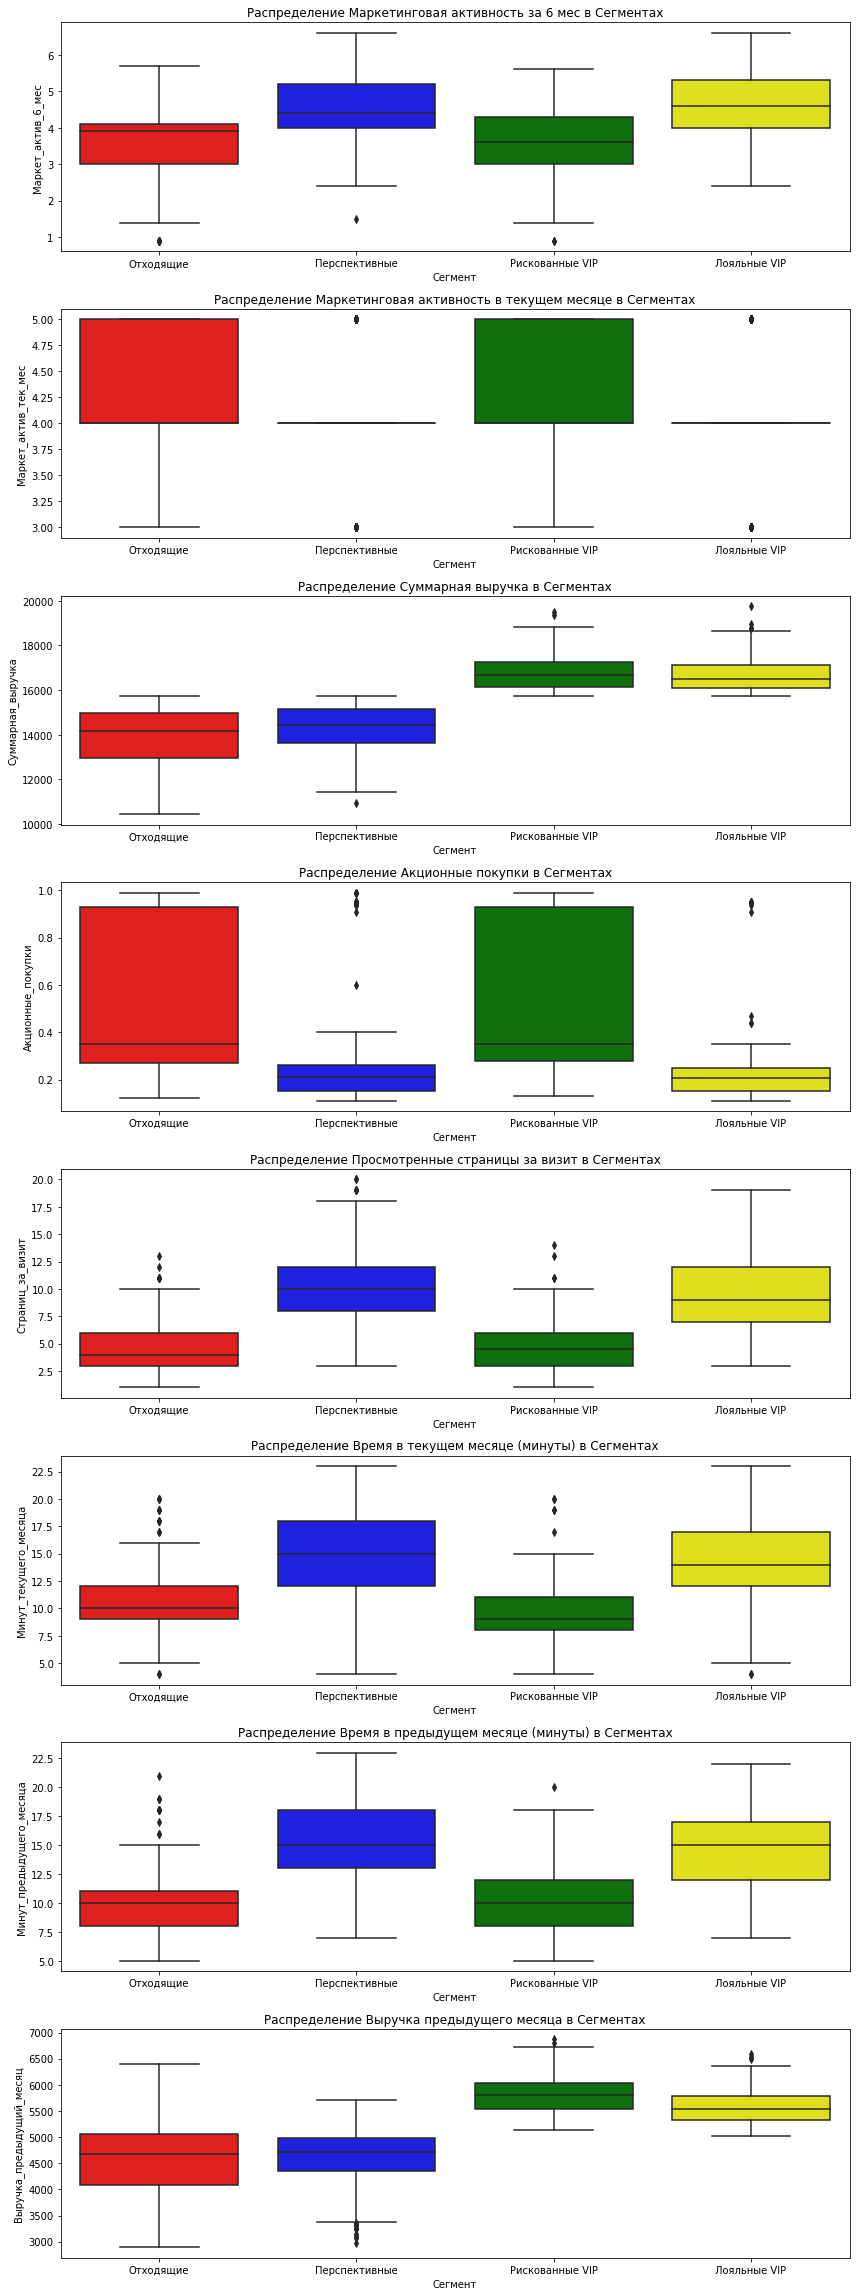

In [118]:
# Список переменных для визуализации
features = [
    ("Маркет_актив_6_мес", "Маркетинговая активность за 6 мес"),
    ("Маркет_актив_тек_мес", "Маркетинговая активность в текущем месяце"),
    ("Суммарная_выручка", "Суммарная выручка"),
    ("Акционные_покупки", "Акционные покупки"),
    ("Страниц_за_визит", "Просмотренные страницы за визит"),
    ("Минут_текущего_месяца", "Время в текущем месяце (минуты)"),
    ("Минут_предыдущего_месяца", "Время в предыдущем месяце (минуты)"),
    ("Выручка_предыдущий_месяц", "Выручка предыдущего месяца")
]

# Визуализация с помощью цикла
plt.figure(figsize=(12, len(features) * 4))  # Настройка размера общей фигуры

for i, (feature, title) in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Создание подграфиков
    sns.boxplot(data=total_df, x="Сегмент", y=feature, palette=["red", "blue", "green", "yellow" ])
    plt.xlabel("Сегмент")
    plt.ylabel(feature)
    plt.title(f"Распределение {title} в Сегментах")

plt.tight_layout()  # Уплотнение графиков для лучшего отображения
plt.show()

__Вывод Шаг 8.__
  
По сравнительным характеристикам видим, что сегмент "Рискованные VIP" заметно меньше проводят времени на сайте и посещают меньше страниц чем другие категории, но при этом оставляют достаточно высокую выручку и активно покупают акционные товары.

Исходя из анализа, можно дать следующие рекомендации для данного сегмента, чтобы повысить их удовлетворенность и стимулировать к увеличению объема покупок через таргетированные и привлекательные предложения.

  
1. Необходимо усиление акционных предложений:
- Персонализированные скидки: Предоставлять индивидуальные скидки на товары и услуги, которые соответствуют интересам и предыдущим покупкам клиентов.
- Эксклюзивные акции: Разрабатывать специальные предложения, доступные только для этого сегмента, чтобы повысить их лояльность и стимулировать повторные покупки.

  
2. Разработать программы лояльности:
- Накопительные бонусы: Вводить системы бонусных баллов за каждую покупку, которые можно обменять на товары или услуги.
- Ранний доступ: Предоставлять "Рискованным VIP" клиентам возможность первыми участвовать в распродажах или получать доступ к новым продуктам.

  
3. Улучшить коммуникацию:
- Делать персонализированные рассылки: Отправлять предложения и новости, основанные на предпочтениях и поведении клиентов.
- Уделять внимание обратной связи: Активно собирать мнения и пожелания клиентов для улучшения сервиса и предложения более релевантных акций.
  
  
4. Регулярно проводить анализ поведения:
- Вести мониторинг откликов: Отслеживать, какие акции наиболее эффективны для данного сегмента, и адаптировать стратегию в соответствии с полученными данными.
- Предсказывать отток: Использовать аналитические инструменты для выявления признаков возможного снижения активности и принимать превентивные меры.

## __Шаг 9. Общий вывод__

В рамках данного проекта для интернет-магазина «В один клик» была проделана комплексная работа по анализу данных, построению модели для прогнозирования активности клиентов, сегментации пользователей и разработке рекомендаций для увеличения покупательской активности. 

Цель проекта состояла в удержании существующих клиентов за счёт персонализированных предложений, основанных на их покупательской активности и прибыльности.

Выполнили следующие шаги: 
1. Загрузили данные и проверили их что данные в таблицах соответствуют описанию.
2. Провели необходимую предобработку данных.
3. Провели исследовательский анализ данных из каждой таблицы.
4. Объединили таблицы market_file, market_money, market_time.
5. Провели корреляционный анализ признаков.
6. Нашли лучшую модель. Для этого использовали пайплайны. Ей оказалась SVC(degree=5, probability=True, random_state=42). 
7. Провели анализ важности признаков.
Малозначимыми признаки для модели оказались:
 1) Популярна_категория_Кухонная_посуда,  
 2) Тип_сервиса,  
 3) Популярная_категория_Товары для детей,  
 4) Разрешить_сообщать_нет,  
 5) Ошибка_сервиса 
Сильнее всего влияют на целевой признак:
 1) Акционные_покупки,  
 2) Страниц_за_визит,  
 3) Минут_текущего_месяца,  
 4) Выручка_пердыдущего_месяца,  
 5) Минут_предыдущего_месяца.


8. Выполнили сегментацию покупателей, в результате чего смогли дать  определенные рекомендации для сегмента "Рискованные VIP" чтобы повысить их удовлетворенность и стимулировать к увеличению объема покупок через таргетированные и привлекательные предложения.:
  
1. Необходимо усиление акционных предложений:
- Персонализированные скидки: Предоставлять индивидуальные скидки на товары и услуги, которые соответствуют интересам и предыдущим покупкам клиентов.
- Эксклюзивные акции: Разрабатывать специальные предложения, доступные только для этого сегмента, чтобы повысить их лояльность и стимулировать повторные покупки.

  
2. Разработать программы лояльности:
- Накопительные бонусы: Вводить системы бонусных баллов за каждую покупку, которые можно обменять на товары или услуги.
- Ранний доступ: Предоставлять "Рискованным VIP" клиентам возможность первыми участвовать в распродажах или получать доступ к новым продуктам.

  
3. Улучшить коммуникацию:
- Делать персонализированные рассылки: Отправлять предложения и новости, основанные на предпочтениях и поведении клиентов.
- Уделять внимание обратной связи: Активно собирать мнения и пожелания клиентов для улучшения сервиса и предложения более релевантных акций.
  
  
4. Регулярно проводить анализ поведения:
- Вести мониторинг откликов: Отслеживать, какие акции наиболее эффективны для данного сегмента, и адаптировать стратегию в соответствии с полученными данными.
- Предсказывать отток: Использовать аналитические инструменты для выявления признаков возможного снижения активности и принимать превентивные меры.


Внедрение предложенных мер поможет интернет-магазину «В один клик» удерживать клиентов с высоким показателем выручки но высоким риском оттока и повысить их лояльность к бренду.
